# OPTIMISERS AND CALLBACKS

In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import random
from random import choice
from string import ascii_uppercase
from time import sleep

import matplotlib.pyplot as plt
%matplotlib inline

### CLASSIFICATION

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [3]:
model = Sequential()

In [4]:
#Adding Convolution layer
img_width, img_height = 64,64
model.add(Conv2D(32,(3,3),input_shape=(img_width,img_height,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

In [5]:
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))

In [6]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

In [7]:
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        1

In [9]:
#Generating image data

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip=True)

test_datagen  = ImageDataGenerator(rescale=1./255)

In [10]:
#Fitting image to the CNN
#Defining data directory
train_data_dir = 'D:/DATASCIENCE/TshirtShirt/training'
validation_data_dir = 'D:/DATASCIENCE/TshirtShirt/validation'

nb_train_samples =1397
nb_validation_samples = 40
epochs = 20
batch_size = 30

training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size=(64,64),
                                                batch_size = batch_size,
                                                class_mode = 'binary')


test_set = test_datagen.flow_from_directory(validation_data_dir,
                                           target_size=(64,64),
                                           batch_size=batch_size,
                                           class_mode='binary')

Found 1397 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


#### EARLY STOPPING

In [11]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor ='val_loss',
                  min_delta = 0,
                  patience=5,
                  verbose=1) #To keeps the best weight

#### REDUCE LR ON PLATEAU

In [12]:
from keras.callbacks import ReduceLROnPlateau

rlrop = ReduceLROnPlateau(monitor='val_loss',
                          factor=0.1,
                          patience=3,
                          verbose = 1,
                         min_delta=0)

In [13]:
from keras.callbacks import ModelCheckpoint

mcp = ModelCheckpoint('fr_4_optimiser.h5',
                     monitor='val_loss',
                     model='min',
                     save_best_only=True,
                     verbose=1)

#### CALLBACKS

In [14]:

callbacks = [es,rlrop,mcp]

In [15]:
#Training and Evaluating the model

def model_fit(optimiser,epochs):
    
    #Compiling the CNN
    model.compile(optimizer = optimiser,loss = 'binary_crossentropy',metrics = ['accuracy'])

    history = model.fit( 
        training_set, 
        steps_per_epoch=nb_train_samples // batch_size, 
        epochs=epochs, 
        validation_data=test_set, 
        callbacks=callbacks,
        validation_steps=nb_validation_samples // batch_size)
    
    # Loss Curves
    plt.figure(figsize=[5,5])
    plt.plot(history.history['loss'],'r',linewidth=1.0)
    plt.plot(history.history['val_loss'],'b',linewidth=1.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=12)
    plt.xlabel('Epochs ',fontsize=12)
    plt.ylabel('Loss',fontsize=12)
    plt.title('Loss Curves',fontsize=12)
    
    # Accuracy Curves
    plt.figure(figsize=[5,5])
    plt.plot(history.history['accuracy'],'r',linewidth=3.0)
    plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=12)
    plt.xlabel('Epochs ',fontsize=12)
    plt.ylabel('Accuracy',fontsize=12)
    plt.title('Accuracy Curves',fontsize=12)
    
    

    history4 = history
    accuracy = history4.history['accuracy']
    val_accuracy = history4.history['val_accuracy']
    loss = history4.history['loss']
    val_loss = history4.history['val_loss']
    epochs = range(len(accuracy))

    plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    
    return model

### OPTIMISERS

#### SGD

Epoch 1/20
46/46 [==============================] - ETA: 0s - loss: 0.7066 - accuracy: 0.4909
Epoch 00001: val_loss improved from inf to 0.68843, saving model to fr_4_optimiser.h5
46/46 [==============================] - 14s 308ms/step - loss: 0.7066 - accuracy: 0.4909 - val_loss: 0.6884 - val_accuracy: 0.5667 - lr: 0.0100
Epoch 2/20
46/46 [==============================] - ETA: 0s - loss: 0.6807 - accuracy: 0.5764
Epoch 00002: val_loss improved from 0.68843 to 0.66747, saving model to fr_4_optimiser.h5
46/46 [==============================] - 14s 294ms/step - loss: 0.6807 - accuracy: 0.5764 - val_loss: 0.6675 - val_accuracy: 0.6667 - lr: 0.0100
Epoch 3/20
46/46 [==============================] - ETA: 0s - loss: 0.6496 - accuracy: 0.6613
Epoch 00003: val_loss improved from 0.66747 to 0.61280, saving model to fr_4_optimiser.h5
46/46 [==============================] - 15s 319ms/step - loss: 0.6496 - accuracy: 0.6613 - val_loss: 0.6128 - val_accuracy: 0.6667 - lr: 0.0100
Epoch 4/20
46/46 

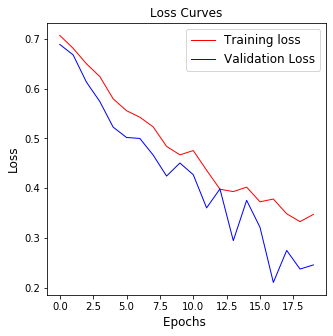

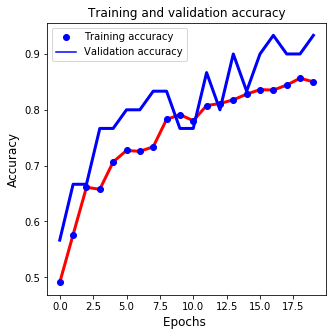

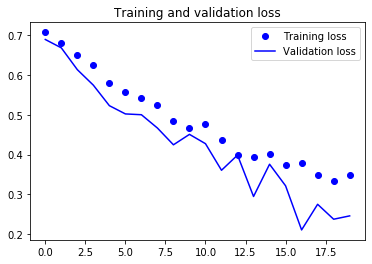

In [16]:
from keras.optimizers import SGD

sgd = SGD(lr=0.01,momentum=0.9)

sgd_model = model_fit(sgd,epochs)

#### RMSprop

Epoch 1/20
46/46 [==============================] - ETA: 0s - loss: 15.7695 - accuracy: 0.6401
Epoch 00001: val_loss did not improve from 0.21115
46/46 [==============================] - 13s 275ms/step - loss: 15.7695 - accuracy: 0.6401 - val_loss: 0.5340 - val_accuracy: 0.6333 - lr: 0.0100
Epoch 2/20
46/46 [==============================] - ETA: 0s - loss: 0.5953 - accuracy: 0.7198
Epoch 00002: val_loss did not improve from 0.21115
46/46 [==============================] - 12s 260ms/step - loss: 0.5953 - accuracy: 0.7198 - val_loss: 0.4725 - val_accuracy: 0.8333 - lr: 0.0100
Epoch 3/20
46/46 [==============================] - ETA: 0s - loss: 0.6416 - accuracy: 0.7162
Epoch 00003: val_loss did not improve from 0.21115
46/46 [==============================] - 12s 264ms/step - loss: 0.6416 - accuracy: 0.7162 - val_loss: 0.5105 - val_accuracy: 0.7000 - lr: 0.0100
Epoch 4/20
46/46 [==============================] - ETA: 0s - loss: 0.5408 - accuracy: 0.7681
Epoch 00004: val_loss did not impr

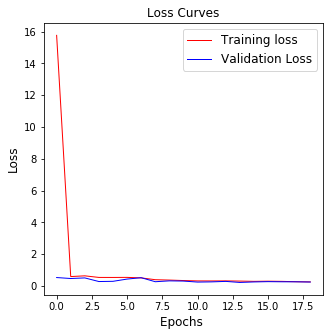

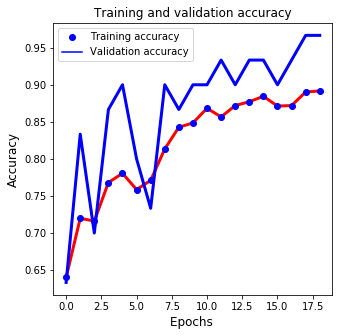

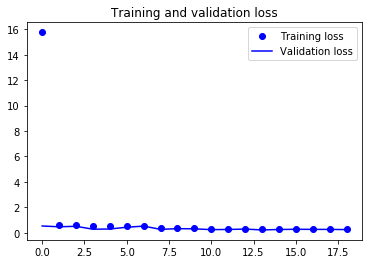

In [17]:
from keras.optimizers import RMSprop

rms = RMSprop(lr=0.01)

rms_model = model_fit(rms,epochs)

#### Adam Optimizer

Epoch 1/20
46/46 [==============================] - ETA: 0s - loss: 0.5305 - accuracy: 0.7381
Epoch 00001: val_loss did not improve from 0.21115
46/46 [==============================] - 12s 264ms/step - loss: 0.5305 - accuracy: 0.7381 - val_loss: 0.3939 - val_accuracy: 0.9000 - lr: 0.0100
Epoch 2/20
46/46 [==============================] - ETA: 0s - loss: 0.4563 - accuracy: 0.7930
Epoch 00002: val_loss did not improve from 0.21115
46/46 [==============================] - 12s 258ms/step - loss: 0.4563 - accuracy: 0.7930 - val_loss: 0.3971 - val_accuracy: 0.9000 - lr: 0.0100
Epoch 3/20
46/46 [==============================] - ETA: 0s - loss: 0.4192 - accuracy: 0.8040
Epoch 00003: val_loss did not improve from 0.21115
46/46 [==============================] - 12s 262ms/step - loss: 0.4192 - accuracy: 0.8040 - val_loss: 0.3710 - val_accuracy: 0.8000 - lr: 0.0100
Epoch 4/20
46/46 [==============================] - ETA: 0s - loss: 0.4032 - accuracy: 0.8120
Epoch 00004: val_loss did not improv

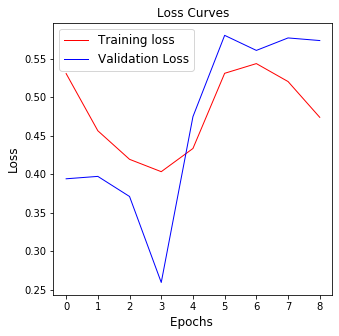

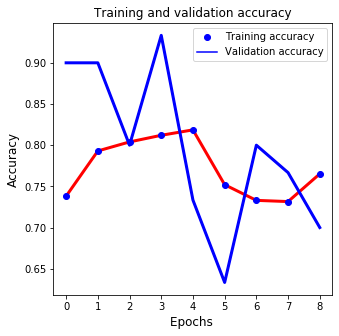

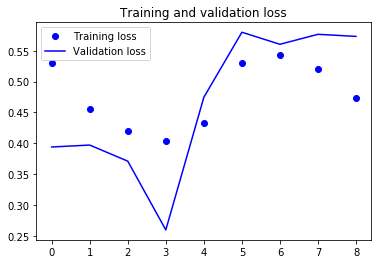

In [21]:
from keras.optimizers import Adam

adam = Adam(lr=0.01)
adam_model = model_fit(adam,epochs)

#### NADAM OPTIMISER

Epoch 1/20
46/46 [==============================] - ETA: 0s - loss: 0.6952 - accuracy: 0.4894
Epoch 00001: val_loss did not improve from 0.21115
46/46 [==============================] - 14s 300ms/step - loss: 0.6952 - accuracy: 0.4894 - val_loss: 0.7058 - val_accuracy: 0.4333 - lr: 0.1000
Epoch 2/20
46/46 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.5150
Epoch 00002: val_loss did not improve from 0.21115
46/46 [==============================] - 14s 308ms/step - loss: 0.6948 - accuracy: 0.5150 - val_loss: 0.6961 - val_accuracy: 0.4333 - lr: 0.1000
Epoch 3/20
46/46 [==============================] - ETA: 0s - loss: 0.6947 - accuracy: 0.4938
Epoch 00003: val_loss did not improve from 0.21115
46/46 [==============================] - 13s 288ms/step - loss: 0.6947 - accuracy: 0.4938 - val_loss: 0.7045 - val_accuracy: 0.4667 - lr: 0.1000
Epoch 4/20
46/46 [==============================] - ETA: 0s - loss: 0.6951 - accuracy: 0.4879
Epoch 00004: val_loss did not improv

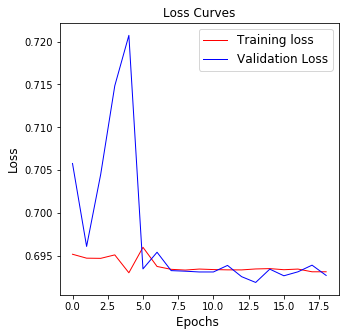

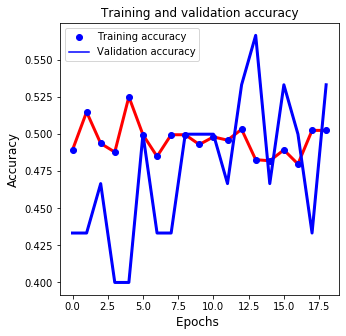

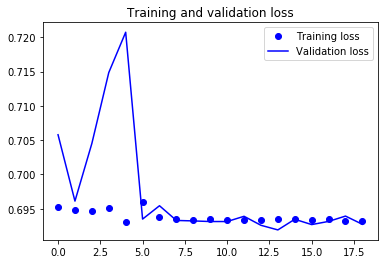

In [32]:
from keras.optimizers import Nadam

nadam = Nadam(lr=0.1)
nadam_model = model_fit(nadam,epochs)

### SAVING MODEL

In [34]:
#Saving the model
nadam_model.save('optimiser_and_callback_nadam.h5')

In [36]:
#Saving the model
adam_model.save('optimiser_and_callback_adam.h5')

In [38]:
#Saving the model
sgd_model.save('optimiser_and_callback_sgd.h5')

In [39]:
#Saving the model
rms_model.save('optimiser_and_callback_rmsprop.h5')

In [41]:
#loading the model for testing
from keras.models import load_model 
classifier = load_model('optimiser_and_callback_rmsprop.h5')

In [43]:
from keras.preprocessing import image
import numpy as np

#Loading image from drive
test_image =image.load_img('D:/DATASCIENCE/TshirtShirt/manual_test/17.jpg',target_size =(64,64))

#Converting image to array
test_image =image.img_to_array(test_image)
test_image =np.expand_dims(test_image, axis =0)

#Predicting image
result = classifier.predict(test_image)
if result[0][0] >= 0.5:
    prediction = 'tshirt'
else:
    prediction = 'shirt'
print(prediction)

shirt


### CONCLUSION

In this assignment, I've tried to classify two category images. I downloaded images from Flipkart for two different categories by using a web scraping script. Then, saved all images in a directory with two labels as a t-shirt and shirt.Then imported the required libraries of Keras and created a model with a convolutional layers, a dense layer, and also added dropout to avoid overfitting/underfitting, then I've used various callbacks and optimisers to check model performance using learning rate and momentum for SGD, then compiled the model with test and train data, After testing multiple images manually I found that the model is predicting 8 out of 10 images correctly.